In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
economicofscale = pd.read_csv('EconomyofScale.csv')

In [3]:
economicofscale.head()

,Units,Cost
0,1.0,95.1
1,1.2,96.5
2,1.2,73.7
3,1.2,95.6
4,1.3,98.8


In [4]:
economicofscale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Units   1000 non-null   float64
 1   Cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


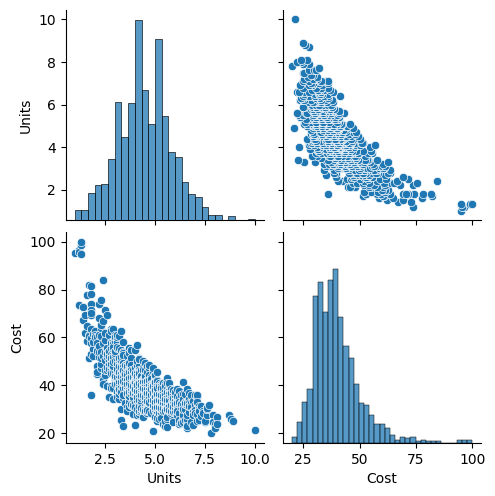

In [5]:
sns.pairplot(economicofscale)

<Axes: ylabel='Cost'>

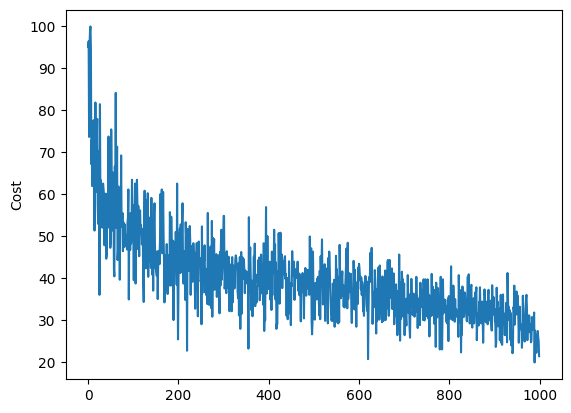

In [6]:
sns.lineplot(data=economicofscale['Cost'])

<Axes: ylabel='Units'>

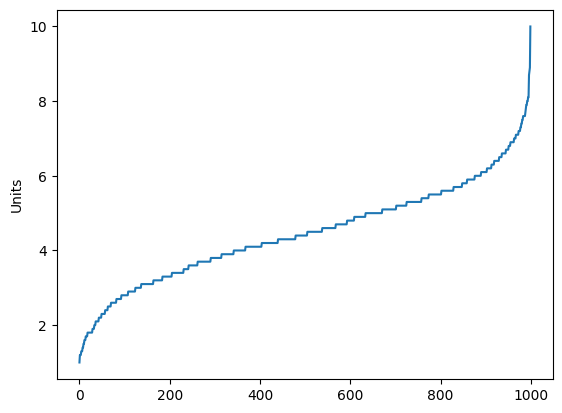

In [7]:
sns.lineplot(data=economicofscale['Units'])

In [8]:
y = economicofscale['Cost']
x = economicofscale[['Units']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=200)




In [10]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [11]:
print(reg_model.intercept_)
print(reg_model.coef_)

66.9506131315543
[-6.01331542]


In [12]:
y_pred = reg_model.predict(x_test)

In [14]:
y_pred_train = reg_model.predict(x_train)

In [13]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.5947456043399266

In [15]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_pred_train)
r2

0.5746210345733738

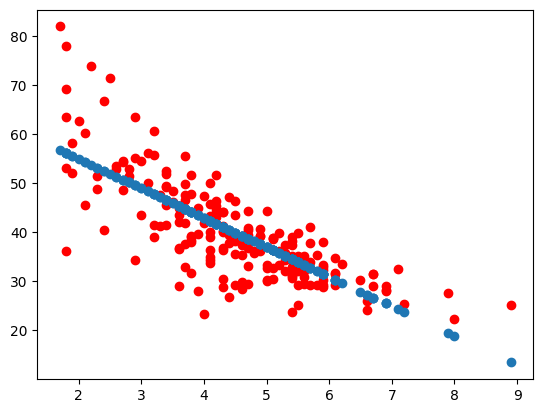

In [16]:
plt.scatter(x_test, y_test, color='red')
plt.scatter(x_test, y_pred)

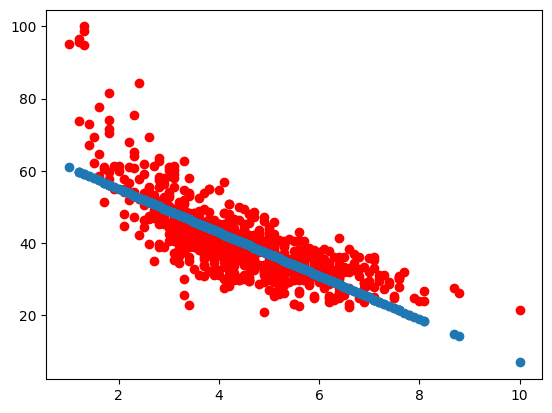

In [17]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, y_pred_train)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
x_poly = poly_regressor.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly,y, test_size=0.2, random_state=200)

In [20]:
reglin_poly = LinearRegression()
reglin_poly.fit(xp_train, yp_train)

LinearRegression()

In [22]:
print(reglin_poly.intercept_)
print(reglin_poly.coef_)

91.12363570183236
[  0.         -17.47611533   1.24316478]


In [23]:
y_pred_poly = reglin_poly.predict(xp_train)

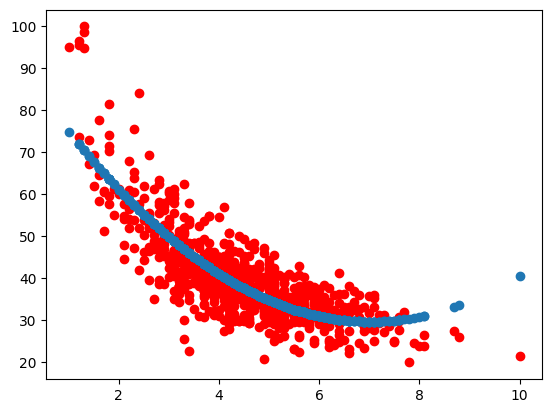

In [25]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, y_pred_poly)

In [26]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_pred_poly)
r2

0.6726741962523373

In [27]:
y = economicofscale['Cost']
X = economicofscale[['Units']]
r2=[]
for i in range(2,8):
    poly_regressor = PolynomialFeatures(degree=i)
    X_poly = poly_regressor.fit_transform(X)
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly,y,random_state =2529)
    regpoly = LinearRegression()
    regpoly.fit(Xp_train, yp_train)
    yp_pred= regpoly.predict(Xp_test)
    r2.append(r2_score(yp_test, yp_pred))

In [28]:
for i in range(len(r2)):
    print(i+2, "->", r2[i])

2 -> 0.7139804293852907
3 -> 0.7430634893542611
4 -> 0.7488001876464003
5 -> 0.7478193464176667
6 -> 0.7391646995969285
7 -> 0.7269296760298289


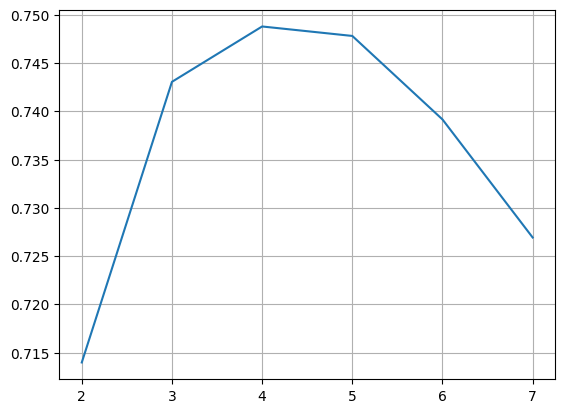

In [29]:
plt.plot(range(2,8), r2)
plt.grid()

In [38]:
y = economicofscale['Cost']
X = economicofscale[['Units']]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state =2529)


poly_regressor = PolynomialFeatures(degree=4)

X_poly = poly_regressor.fit_transform(X)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly,y,random_state =2529)
regpoly = LinearRegression()
regpoly.fit(Xp_train, yp_train)
yp_pred= regpoly.predict(Xp_test)
r2=r2_score(yp_test, yp_pred)
r2

0.7488001876464003

In [39]:
yp_pred_train= regpoly.predict(Xp_train)

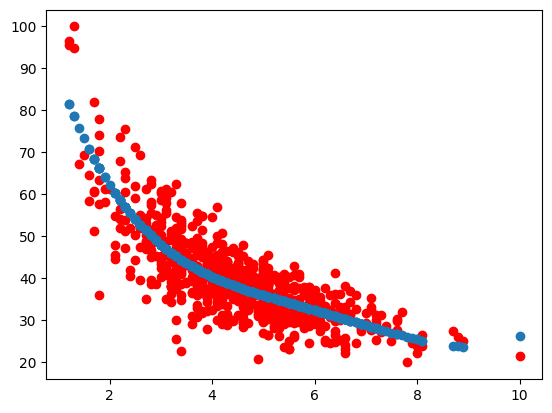

In [41]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, regpoly.predict(Xp_train))